In [ ]:
from alpaca.statistics.chisquared import get_chi2
from alpaca.statistics.functions import nsigmas
from alpaca.models.model_library import QED_DFSZ, beta
from alpaca.plotting.palettes import newmagma, darker_set3
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from alpaca.plotting.mpl import exclusionplot as mpl_plot
from alpaca.plotting.bokeh import exclusionplot as bokeh_plot
import json
from alpaca import ALPcouplings

In [ ]:
ma = np.hstack([np.logspace(-2, 0, 60), np.linspace(1.01, 10, 60)])
fa = np.logspace(2.2, 7, 50)

In [ ]:
compute_couplings = False
if compute_couplings:
    couplings = [QED_DFSZ.get_couplings({beta: np.pi/4}, f).match_run(10.1, 'VA_below') for f in fa]
    with open('couplings_QEDDFSZ.json', 'w') as f:
        d = {}
        for i in range(50):
            d |= {fa[i]: list(np.real(couplings[0].translate('kF_below')._toarray()))+list(np.imag(couplings[0].translate('kF_below')._toarray()))}
        json.dump(d, f)
else:
    with open('couplings_QEDDFSZ.json', 'r') as f:
        r = json.load(f)
    couplings = []
    for k, v in r.items():
        couplings.append(ALPcouplings._fromarray(np.array(v[:55])+1j*np.array(v[55:]), k, 'kF_below'))

In [ ]:
x_ma, y_couplings = np.meshgrid(ma, couplings)
x_ma, y_fa = np.meshgrid(ma, fa)

In [3]:
transitions = [
    'B+ -> K+ a',
    'B0 -> K*0 a',
    'B+ -> K+ e e',
    'B0 -> K*0 e e',
    'B+ -> K+ mu mu',
    'B0 -> K*0 mu mu',
    'B+ -> K+ gamma gamma',
    'B+ -> K+ tau tau',
    'B0 -> K*0 tau tau',
    'Y(3S) -> gamma tau tau',
    'K+ -> pi+ a',
    'KL -> pi0 a'
]

In [4]:
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$', 'B+ -> K+ gamma gamma': r'$B^+ \to K^+ \gamma \gamma$', 'B+ -> K+ tau tau': r'$B^+ \to K^+ \tau^+ \tau^-$', 'B0 -> K*0 tau tau': r'$B^0 \to K^{*0} \tau^+ \tau^-$', 'Y(3S) -> gamma tau tau': r'$\Upsilon(3S) \to \gamma \tau^+ \tau^-$', 'B -> K mu mu': r'$B \to K^{(*)} \mu^+ \mu^-$', 'B -> K nu nu': r'$B \to K^{(*)} \nu \bar{\nu}$', 'B -> K e e': r'$B \to K^{(*)} e^+ e^-$', 'K -> pi a': r'$K \to \pi \nu \bar{\nu}$'}

In [7]:
chi2 = get_chi2(transitions, x_ma, y_couplings, y_fa, br_dark = 0.0, integrator='leadinglog', min_probability=1e-5)

TypeError: bad operand type for unary -: 'LazyFloat'

In [6]:
chi2.keys()

dict_keys([('B+ -> K+ a', 'Belle II'), ('B0 -> K*0 a', 'BaBar'), ('B+ -> K+ e e', 'Belle II'), ('B0 -> K*0 e e', 'Belle II'), ('B+ -> K+ mu mu', 'LHCb'), ('B+ -> K+ mu mu', 'Belle II'), ('B+ -> K+ mu mu', 'CHARM'), ('B0 -> K*0 mu mu', 'LHCb'), ('B0 -> K*0 mu mu', 'Belle II'), ('B+ -> K+ gamma gamma', 'BaBar'), ('B+ -> K+ tau tau', 'BaBar'), ('B0 -> K*0 tau tau', 'Belle'), ('Y(3S) -> gamma tau tau', 'BaBar'), ('K+ -> pi+ a', 'NA62'), ('KL -> pi0 a', 'KOTO'), ('', 'Global')])

In [ ]:
from alpaca.statistics.chisquared import combine_chi2

In [ ]:
chi2_summary ={
    ('B -> K nu nu', 'Combined'): combine_chi2(chi2[('B+ -> K+ a', 'Belle II')], chi2[('B0 -> K*0 a', 'BaBar')]),
    ('B -> K e e', 'Combined'): combine_chi2(chi2[('B+ -> K+ e e', 'Belle II')], chi2[('B0 -> K*0 e e', 'Belle II')]),
    ('B -> K mu mu', 'Combined'): combine_chi2(chi2[('B+ -> K+ mu mu', 'Belle II')], chi2[('B0 -> K*0 mu mu', 'Belle II')], chi2[('B+ -> K+ mu mu', 'LHCb')], chi2[('B+ -> K+ mu mu', 'CHARM')], chi2[('B0 -> K*0 mu mu', 'LHCb')]),
    ('B+ -> K+ tau tau', 'BaBar'): chi2[('B+ -> K+ tau tau', 'BaBar')],
    ('Y(3S) -> gamma tau tau', 'BaBar'): chi2[('Y(3S) -> gamma tau tau', 'BaBar')],
    ('K -> pi a', 'Combined'): combine_chi2(chi2[('K+ -> pi+ a', 'NA62')], chi2[('KL -> pi0 a', 'KOTO')]),
    ('', 'Global'): chi2[('','Global')]
    }

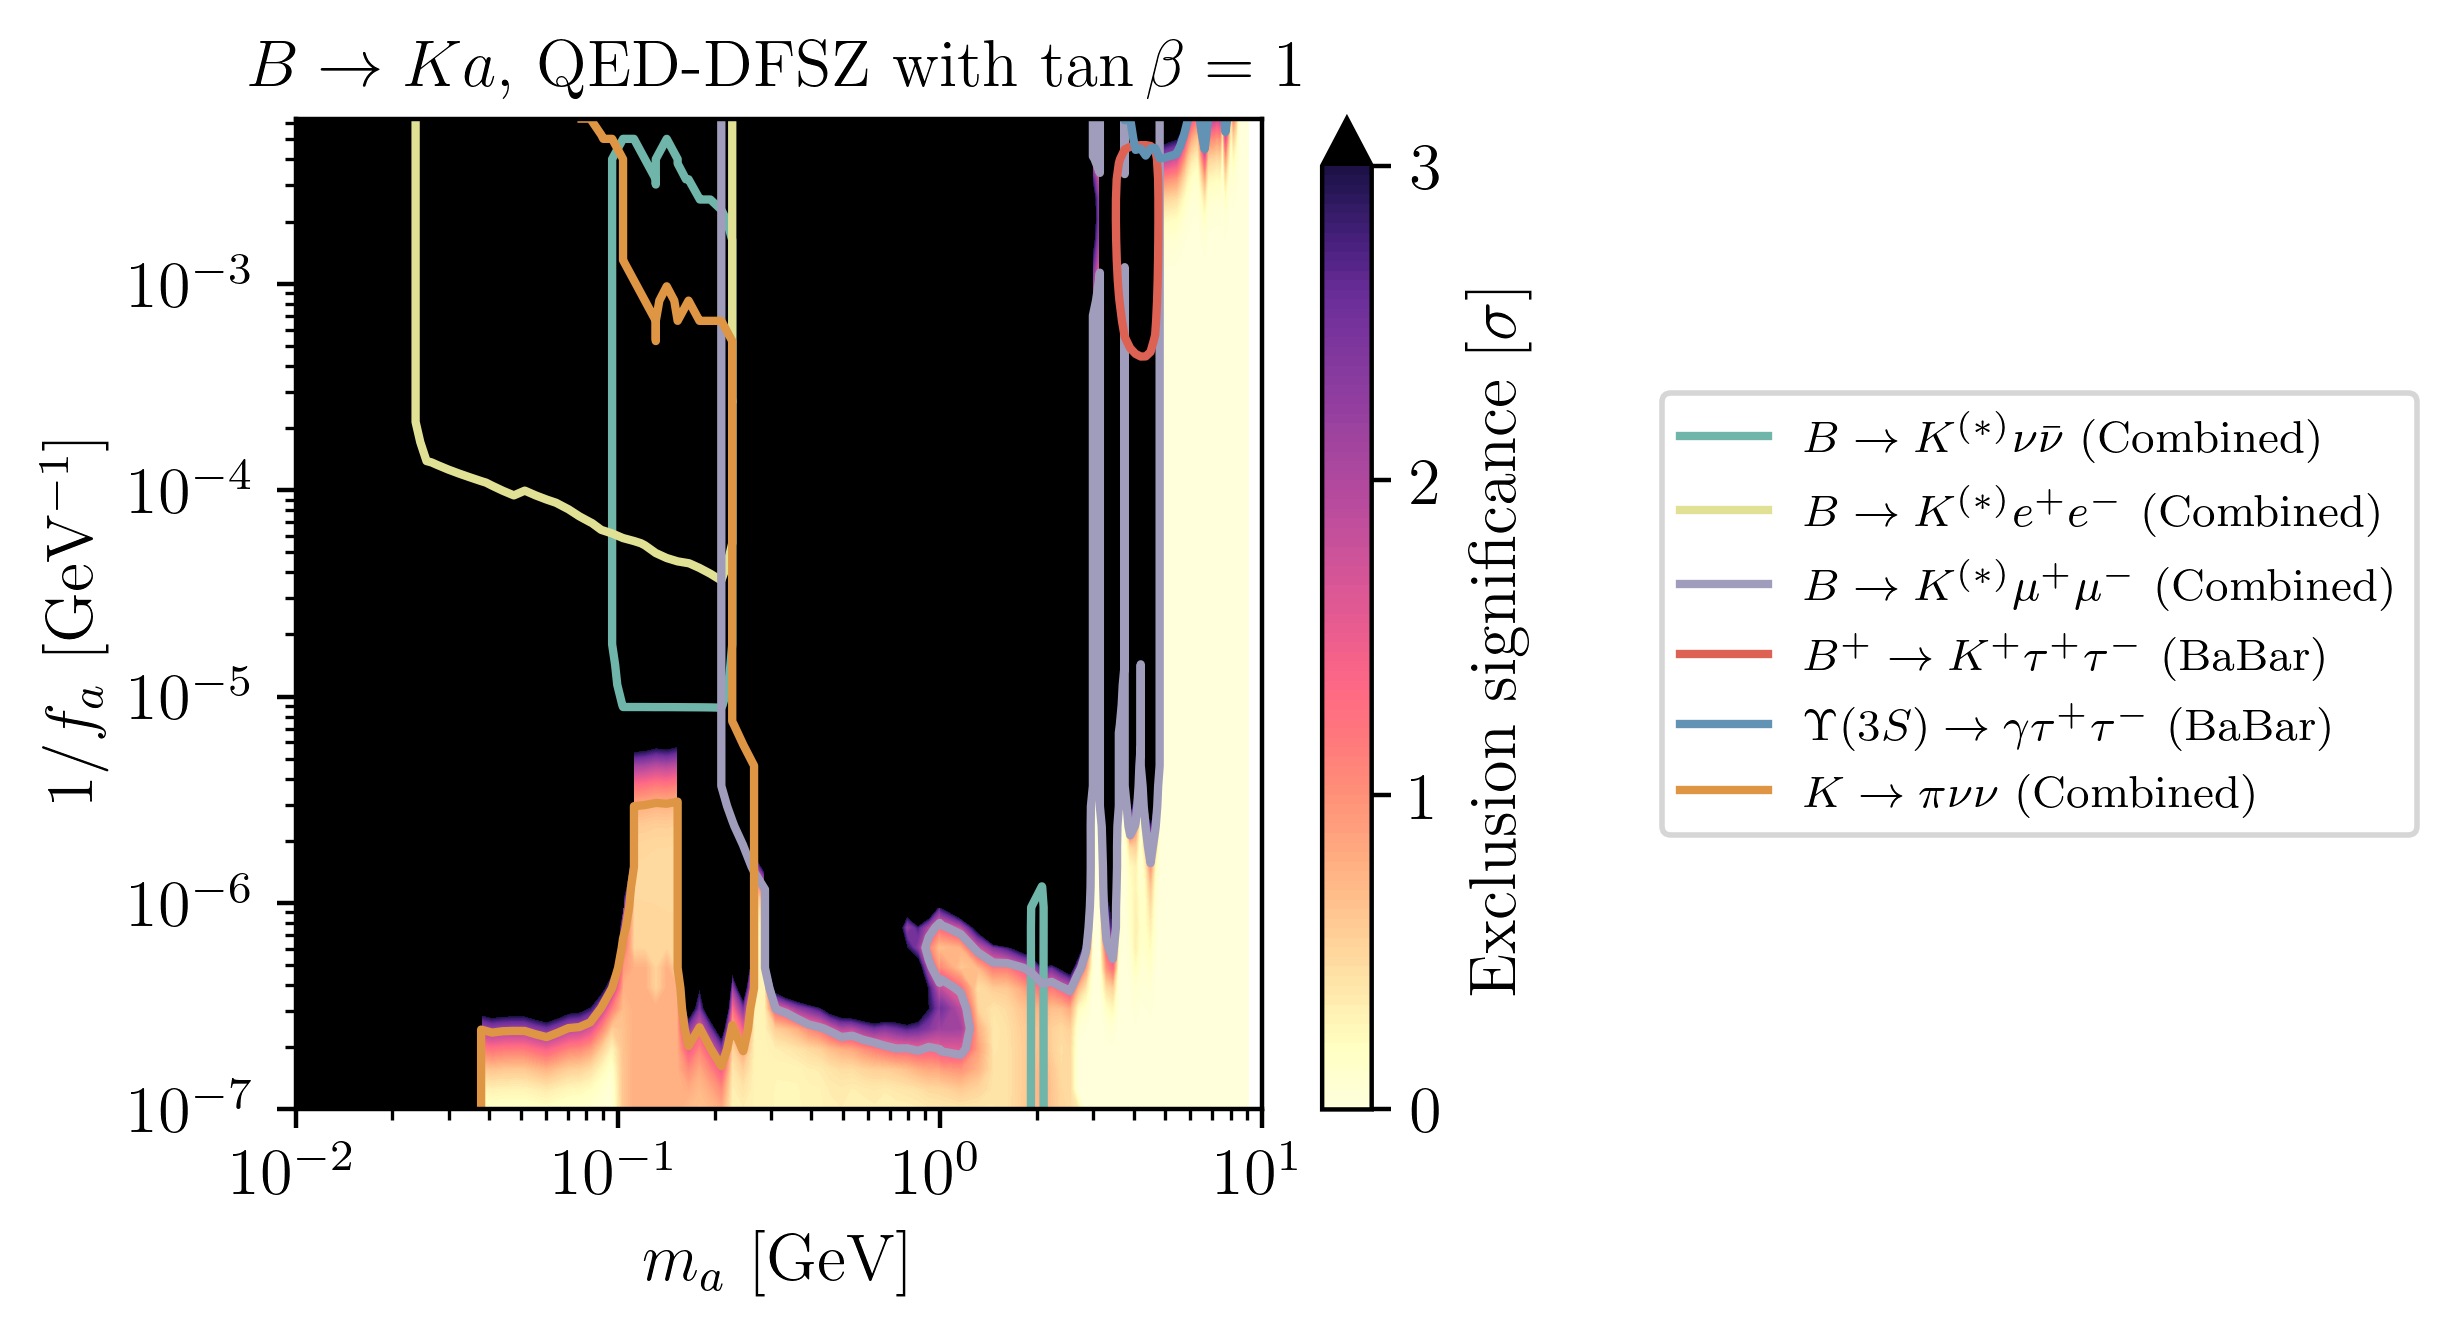

In [ ]:
fig, ax = mpl_plot(x_ma, 1/y_fa, chi2_summary, xlabel=r'$m_a$ [GeV]', ylabel=r'$1/f_a$ [GeV$^{-1}$]', title=r'$B \to K a$, QED-DFSZ with $\tan\beta = 1$', tex=tex)
fig.set_figwidth(14/2.54)
fig.set_figheight(8/2.54)
fig.set_dpi(400)
#ax.set_xticks([0.1, 1, 5])
#ax.set_xlim(0.1, 10)
fig.show()

In [ ]:
chi2 = get_chi2(transitions, x_ma, y_couplings, y_fa, br_dark = 1e-3, integrator='no_rge')

In [ ]:
chi2_summary ={
    ('B -> K nu nu', 'Combined'): combine_chi2(chi2[('B+ -> K+ a', 'Belle II')], chi2[('B0 -> K*0 a', 'BaBar')]),
    ('B -> K e e', 'Combined'): combine_chi2(chi2[('B+ -> K+ e e', 'Belle II')], chi2[('B0 -> K*0 e e', 'Belle II')]),
    ('B -> K mu mu', 'Combined'): combine_chi2(chi2[('B+ -> K+ mu mu', 'Belle II')], chi2[('B0 -> K*0 mu mu', 'Belle II')], chi2[('B+ -> K+ mu mu', 'LHCb')], chi2[('B+ -> K+ mu mu', 'CHARM')], chi2[('B0 -> K*0 mu mu', 'LHCb')]),
    ('B+ -> K+ tau tau', 'BaBar'): chi2[('B+ -> K+ tau tau', 'BaBar')],
    ('Y(3S) -> gamma tau tau', 'BaBar'): chi2[('Y(3S) -> gamma tau tau', 'BaBar')],
    ('K -> pi a', 'Combined'): combine_chi2(chi2[('K+ -> pi+ a', 'NA62')], chi2[('KL -> pi0 a', 'KOTO')]),
    ('', 'Global'): chi2[('','Global')]
    }

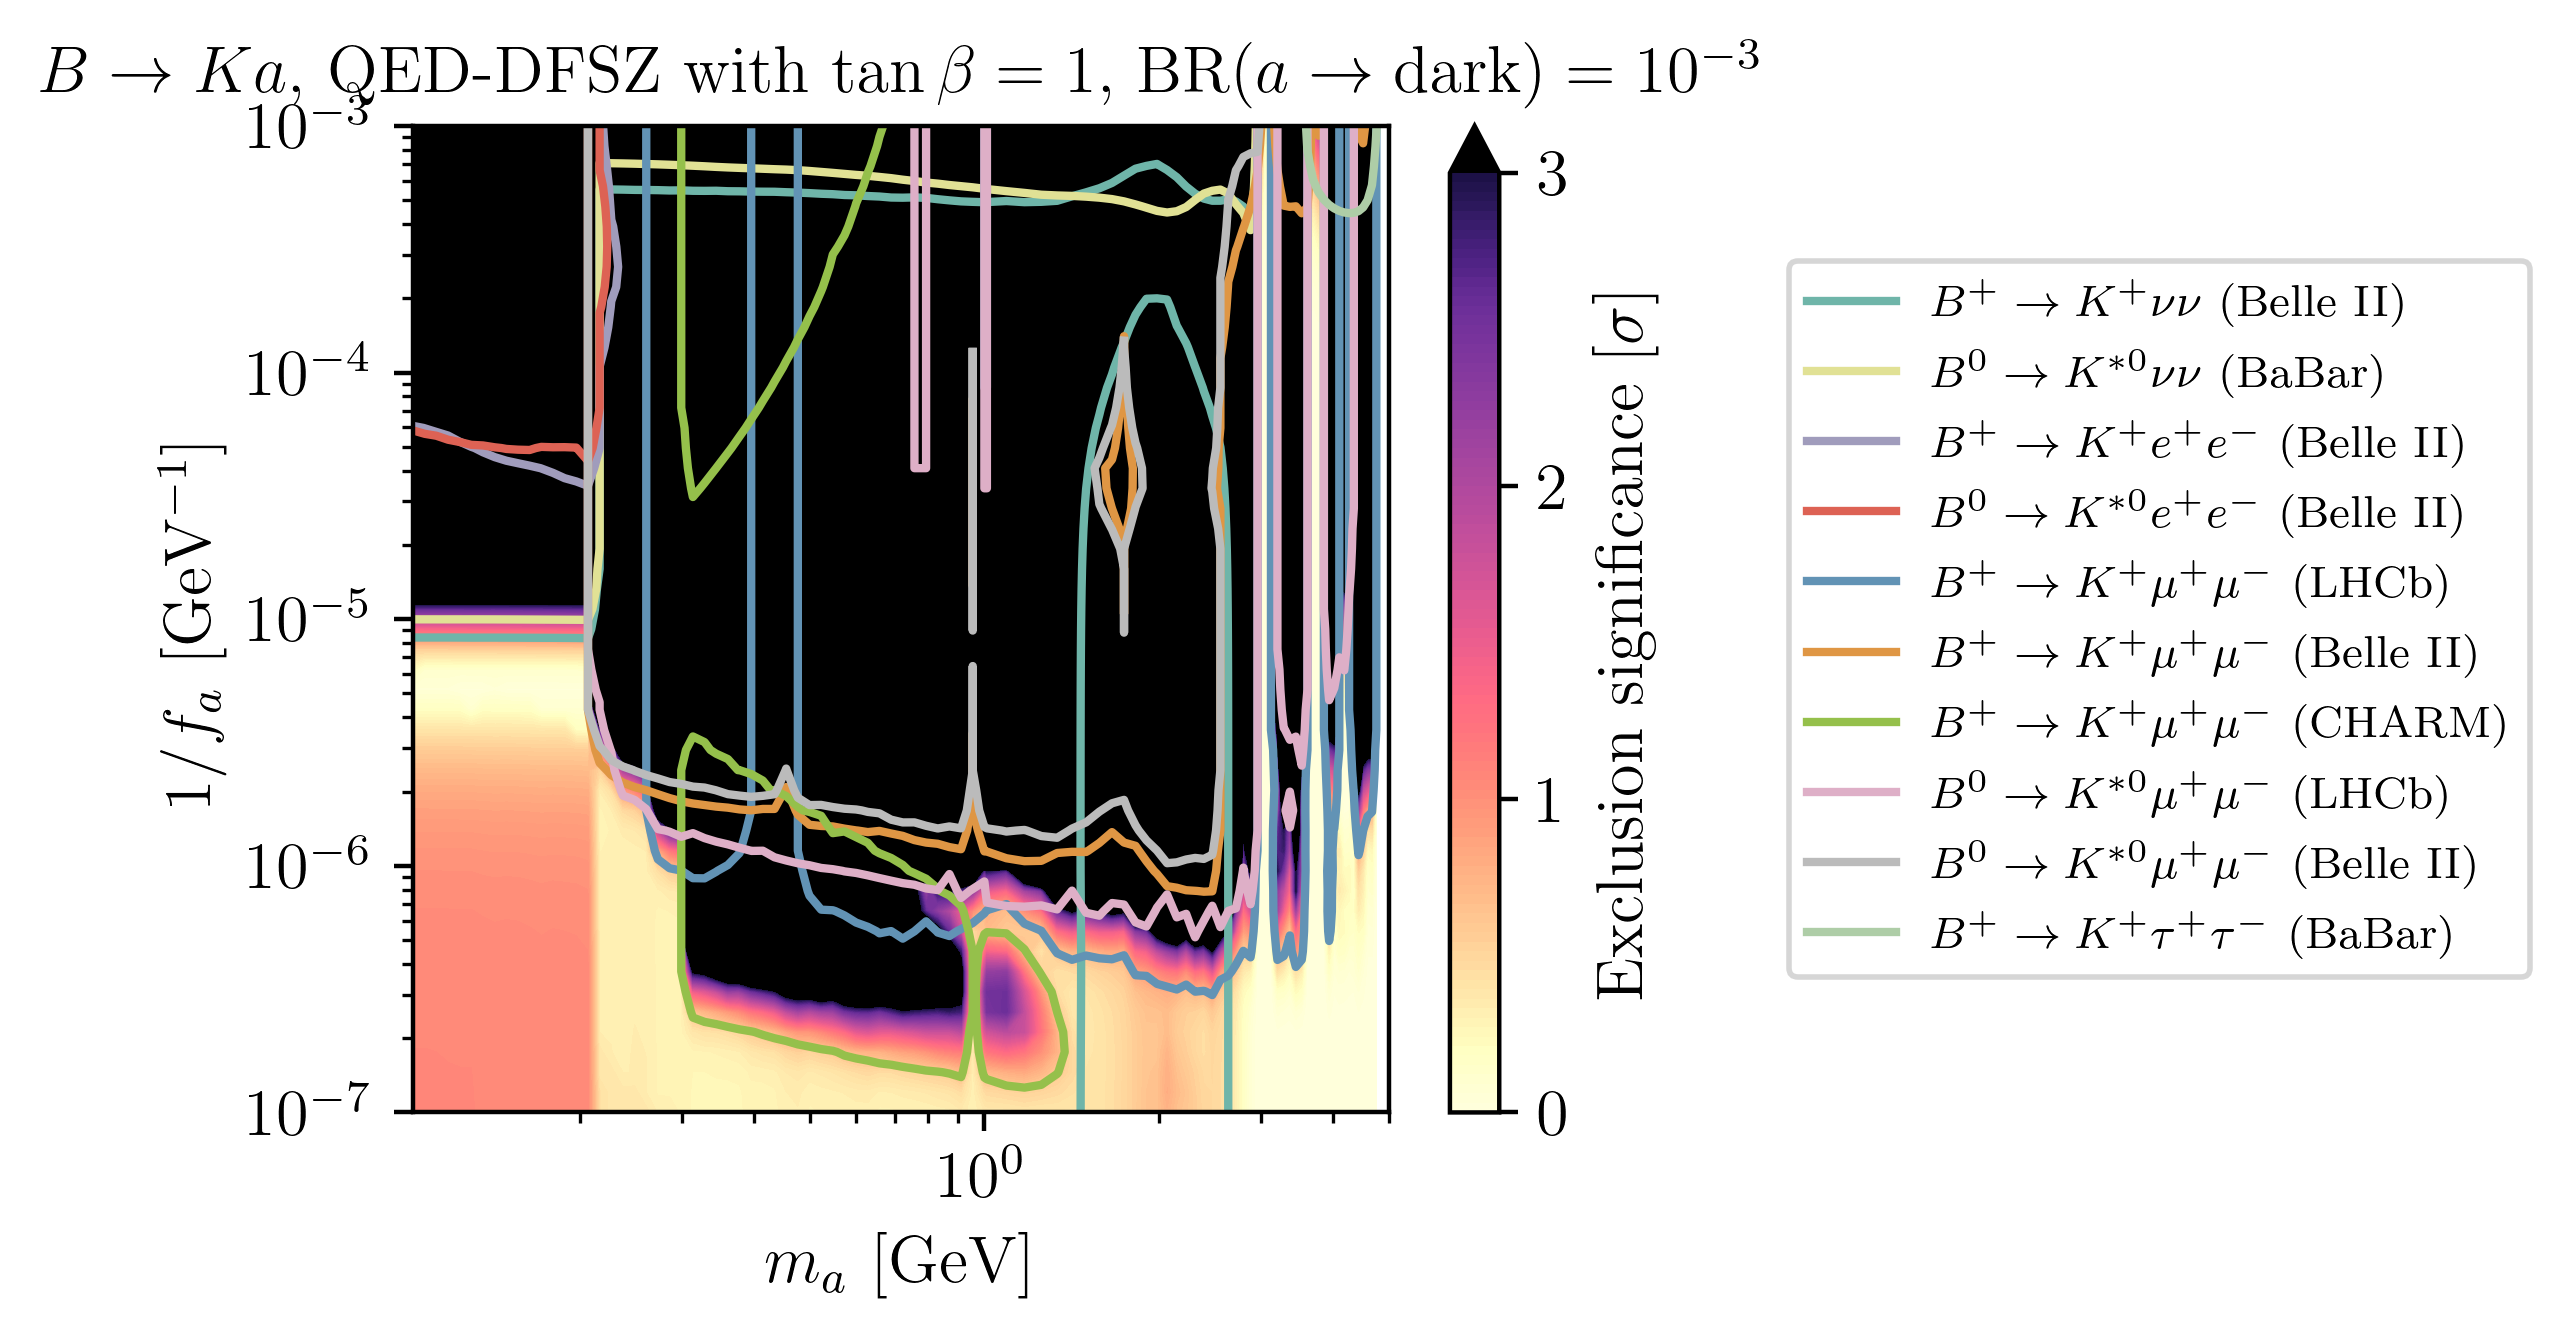

In [ ]:
fig, ax = mpl_plot(x_ma, 1/y_fa, chi2_summary, xlabel=r'$m_a$ [GeV]', ylabel=r'$1/f_a$ [GeV$^{-1}$]', title=r'$B \to K a$, QED-DFSZ with $\tan\beta = 1$, $\mathrm{BR}(a\to \mathrm{dark}) = 10^{-3}$', tex=tex)
fig.set_figwidth(14/2.54)
fig.set_figheight(8/2.54)
fig.set_dpi(400)
fig.show()

In [10]:
chi2_dark = get_chi2(transitions, x_ma, y_couplings, y_fa, br_dark = 0.99, integrator='no_rge')

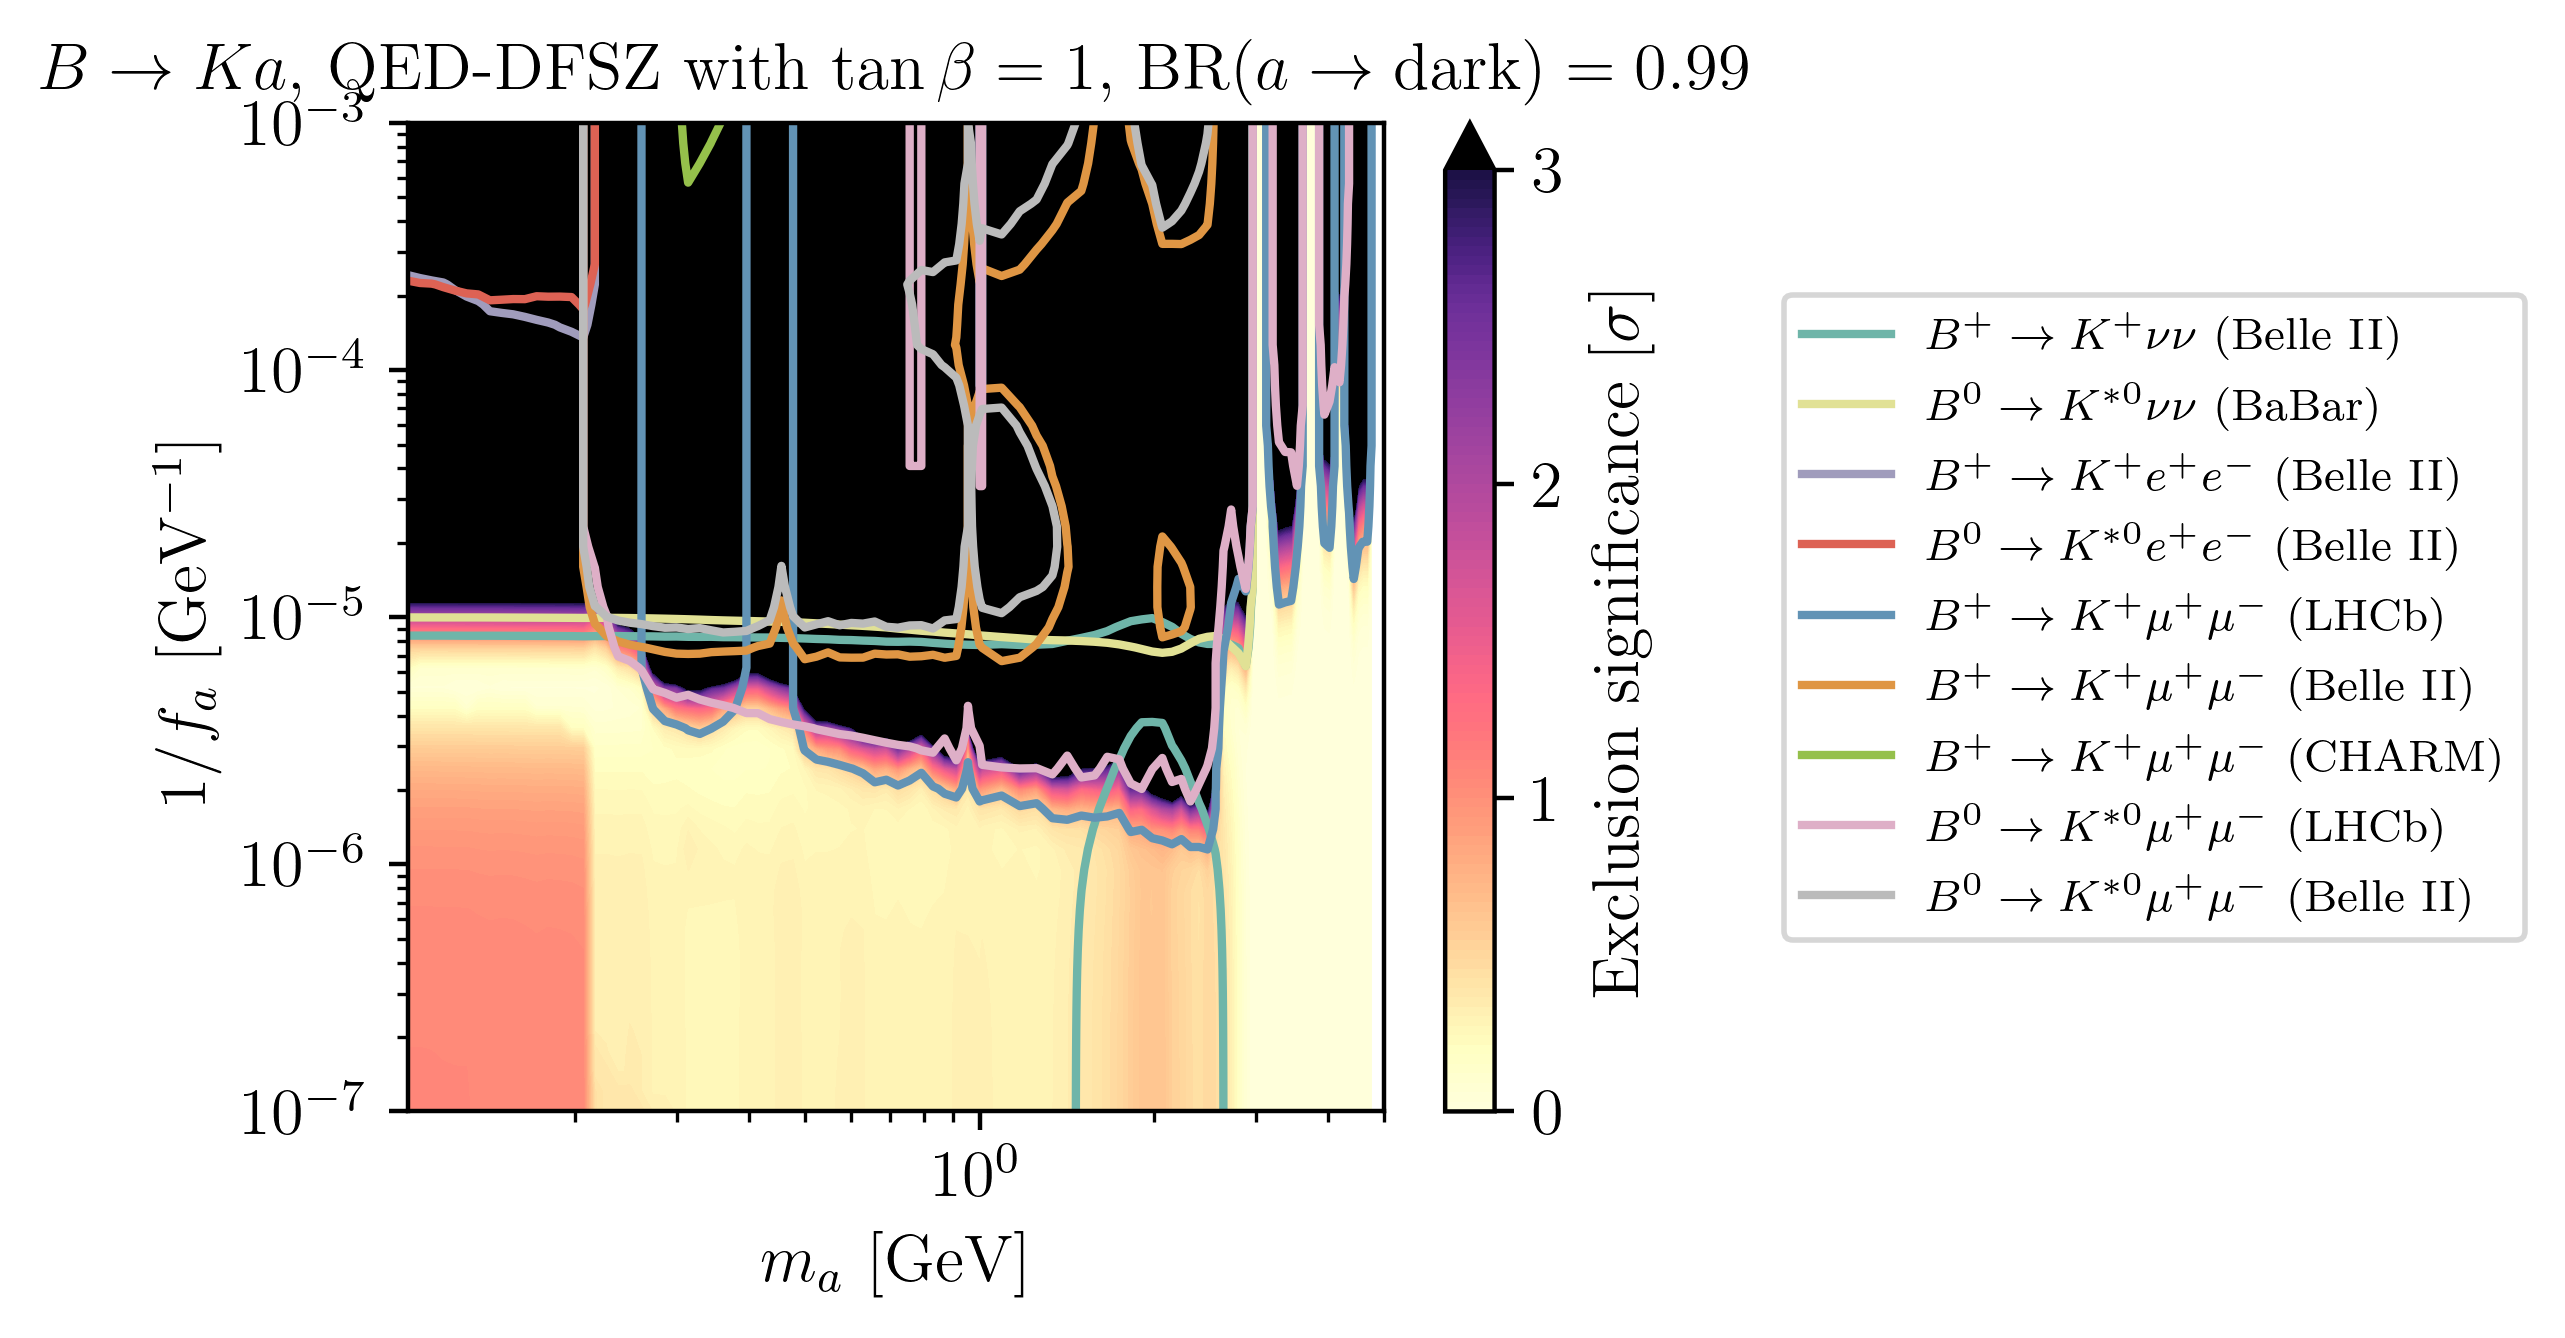

In [ ]:
fig, ax = mpl_plot(x_ma, 1/y_fa, chi2_dark, xlabel=r'$m_a$ [GeV]', ylabel=r'$1/f_a$ [GeV$^{-1}$]', title=r'$B \to K a$, QED-DFSZ with $\tan\beta = 1$, $\mathrm{BR}(a\to \mathrm{dark}) = 0.99$', tex=tex)
fig.set_figwidth(14/2.54)
fig.set_figheight(8/2.54)
fig.set_dpi(400)
fig.show()

In [12]:
ma = 2.0
br_dark = np.logspace(-5, 0.0, 50)
x_br_dark, y_couplings = np.meshgrid(br_dark, couplings)
x_br_dark, y_fa = np.meshgrid(br_dark, fa)

In [13]:
chi2_dark = get_chi2(transitions, ma, y_couplings, y_fa, br_dark = x_br_dark, integrator='no_rge', min_probability=0)

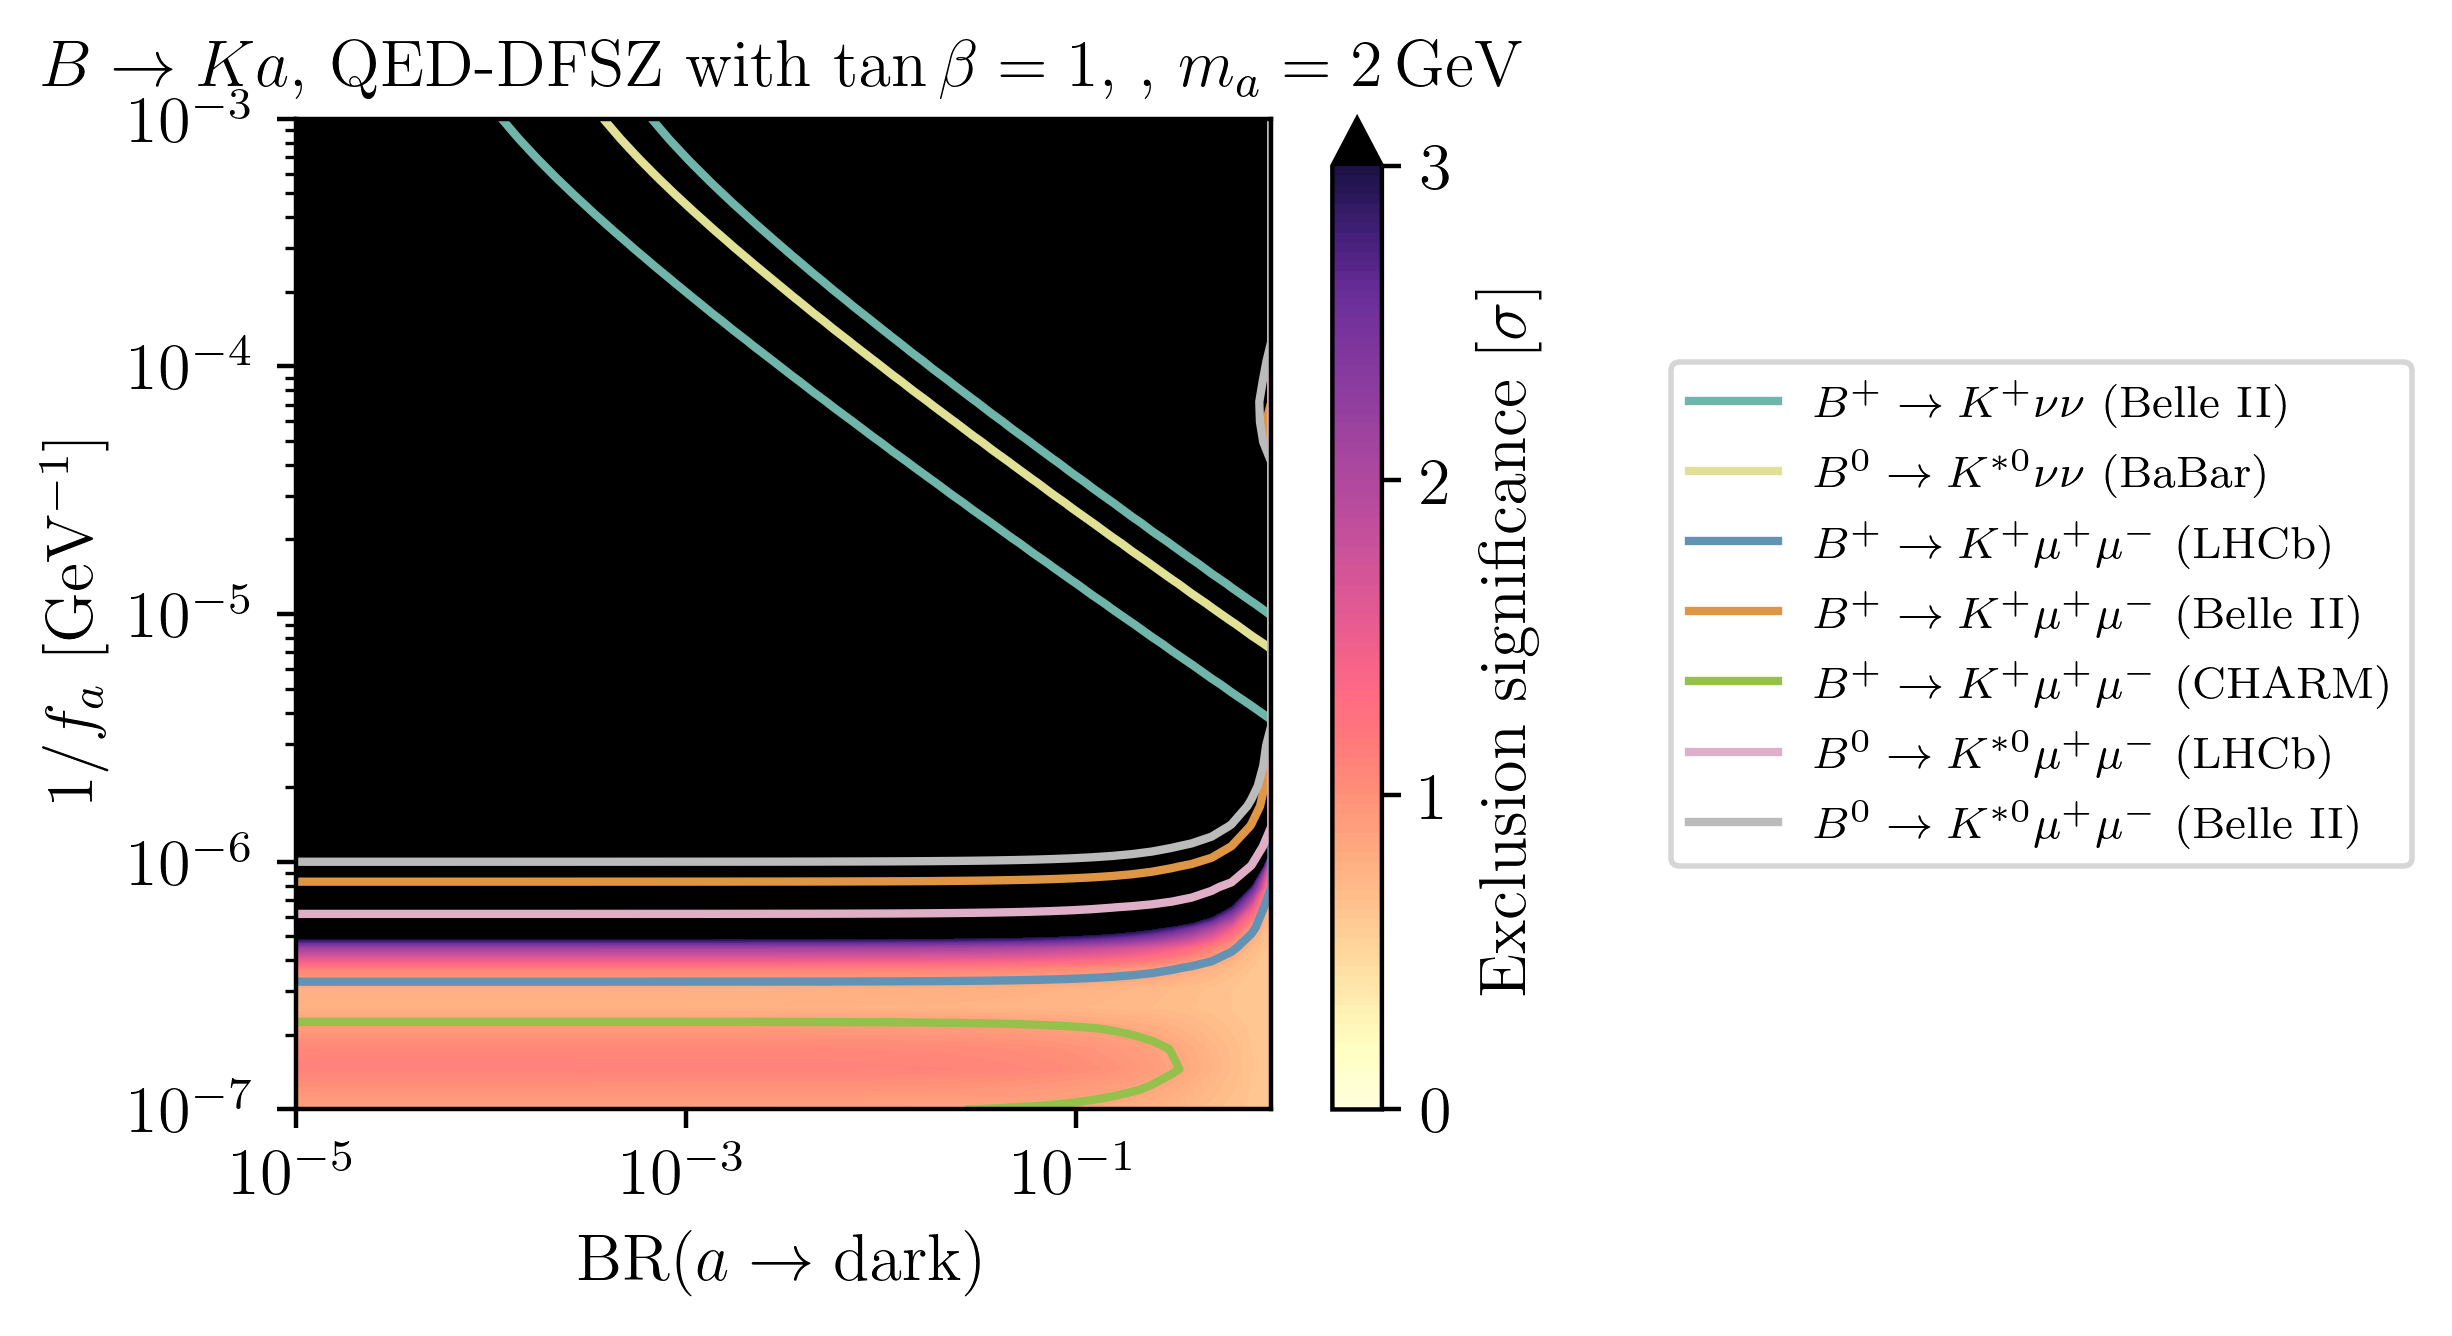

In [ ]:
fig, ax = mpl_plot(x_br_dark, 1/y_fa, chi2_dark, xlabel=r'$\mathrm{BR}(a\to \mathrm{dark})$', ylabel=r'$1/f_a$ [GeV$^{-1}$]', title=r'$B \to K a$, QED-DFSZ with $\tan\beta = 1$, , $m_a = 2\,\mathrm{GeV}$', tex=tex)
fig.set_figwidth(14/2.54)
fig.set_figheight(8/2.54)
fig.set_dpi(400)
fig.show()

In [15]:
ma = 2.0
br_dark = 1-np.logspace(-5, 0.0, 50)
x_br_dark, y_couplings = np.meshgrid(br_dark, couplings)
x_br_dark, y_fa = np.meshgrid(br_dark, fa)

In [16]:
chi2_dark = get_chi2(transitions, ma, y_couplings, y_fa, br_dark = x_br_dark, integrator='no_rge', min_probability=0)

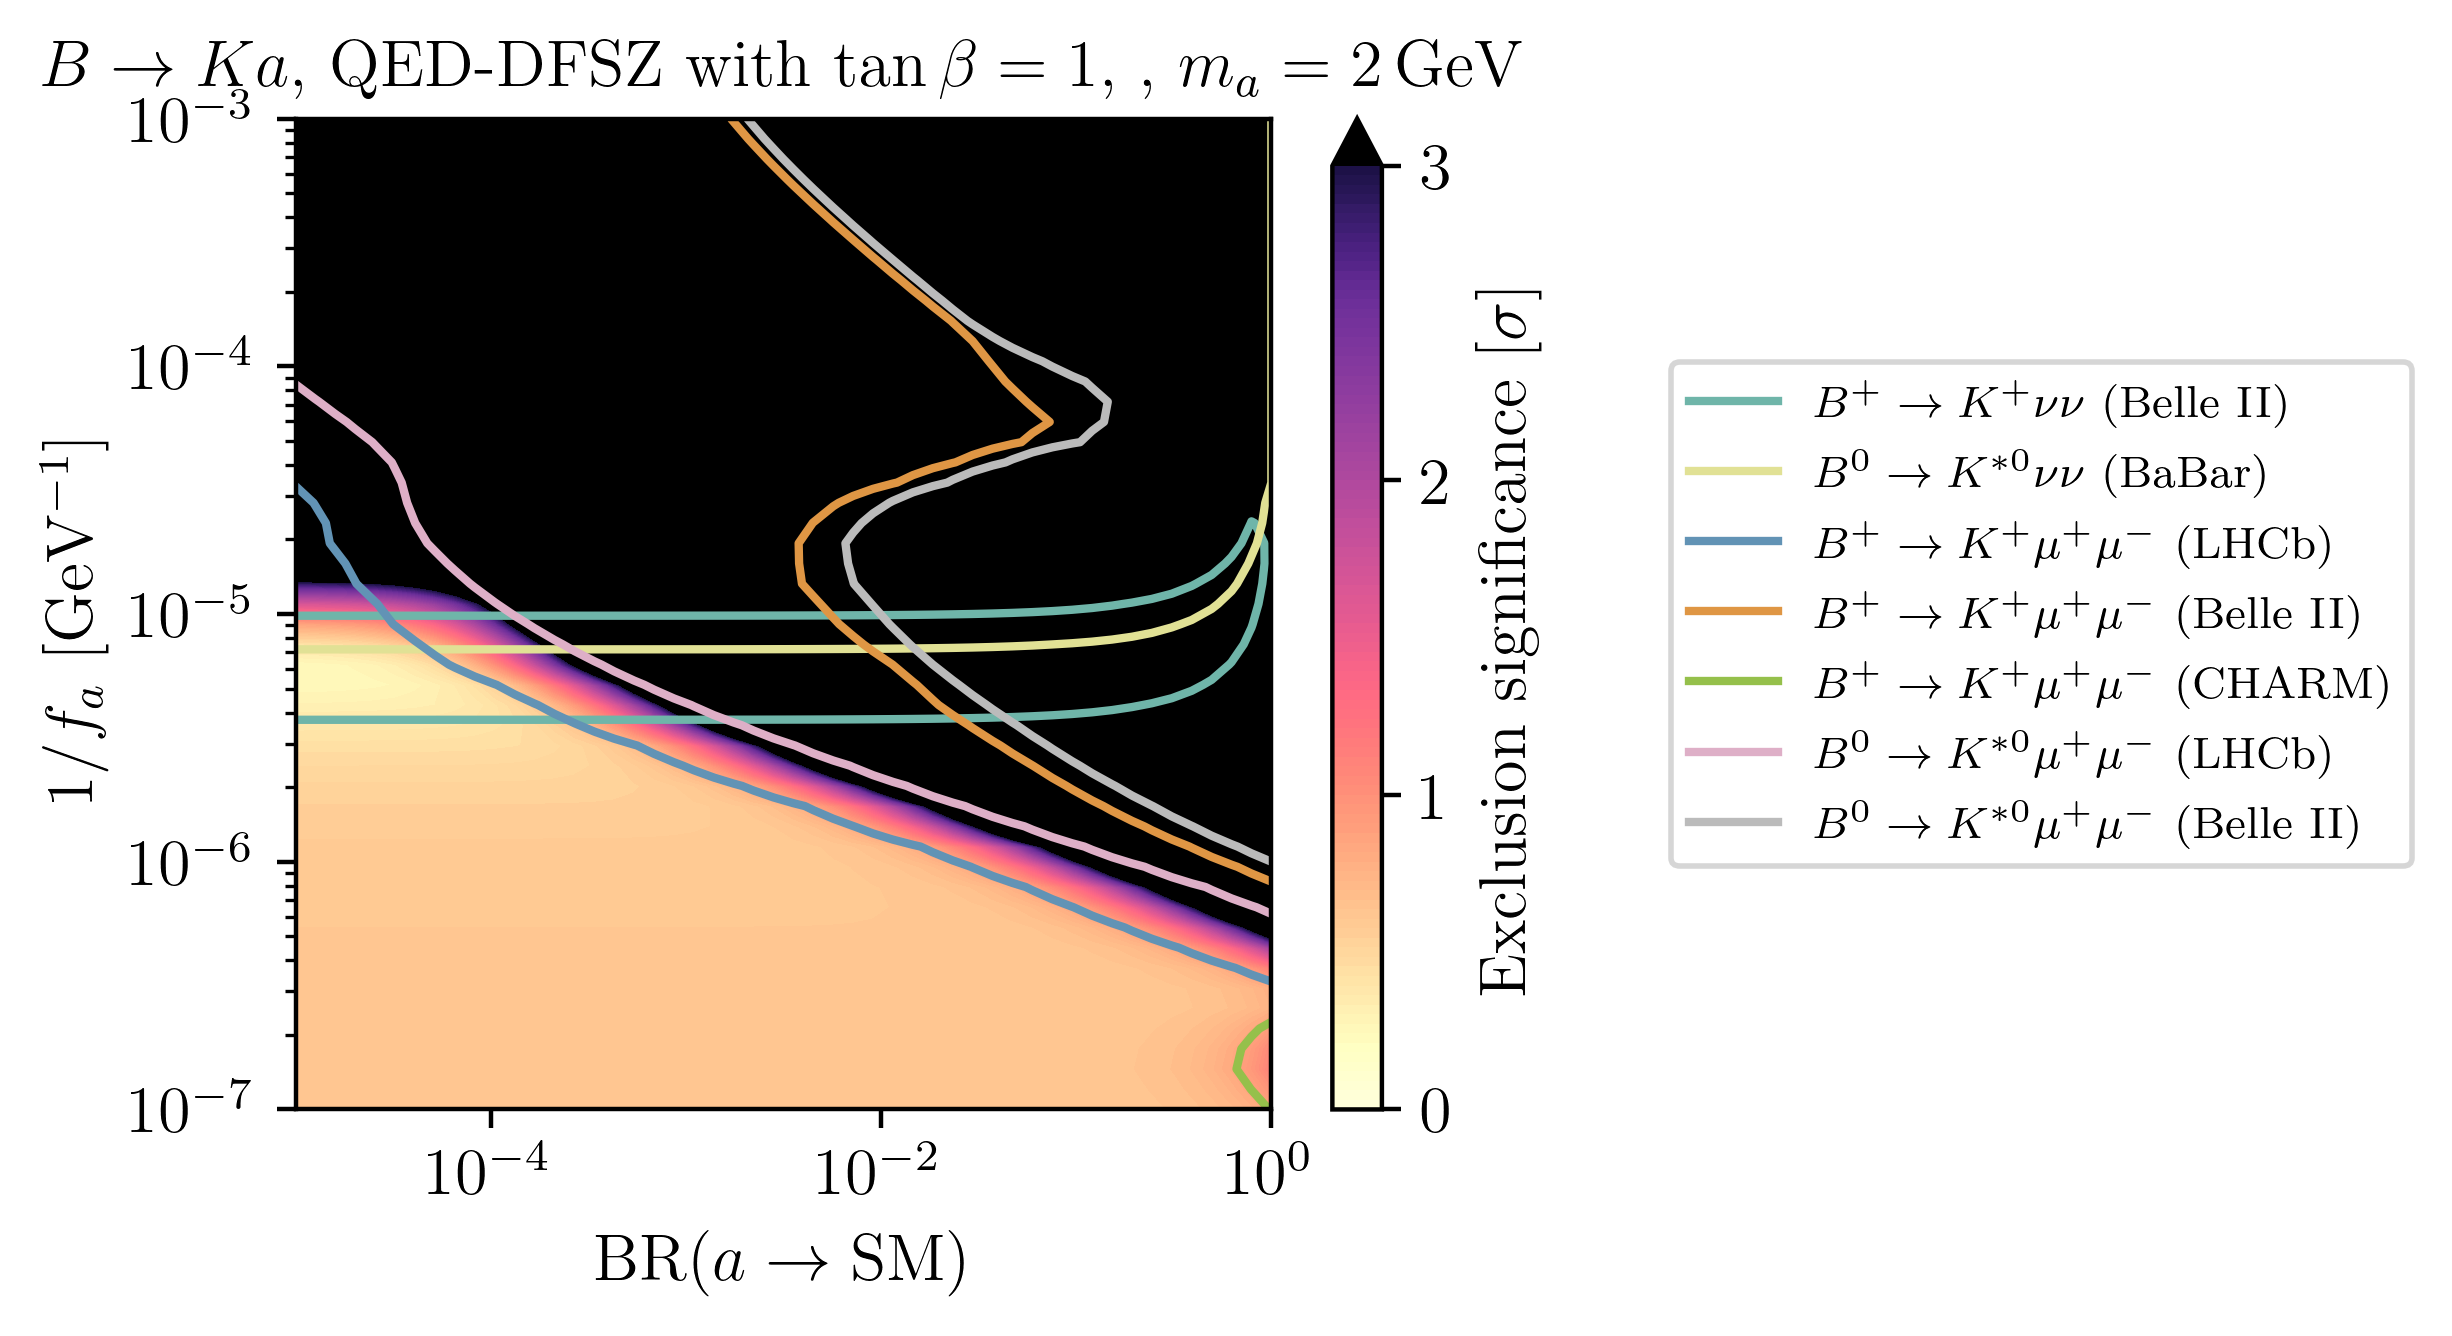

In [ ]:
fig, ax = mpl_plot(1-x_br_dark, 1/y_fa, chi2_dark, xlabel=r'$\mathrm{BR}(a\to \mathrm{SM})$', ylabel=r'$1/f_a$ [GeV$^{-1}$]', title=r'$B \to K a$, QED-DFSZ with $\tan\beta = 1$, , $m_a = 2\,\mathrm{GeV}$', tex=tex)
fig.set_figwidth(14/2.54)
fig.set_figheight(8/2.54)
fig.set_dpi(400)
fig.show()

In [ ]:
chi2_dark = get_chi2(transitions, 0.3, y_couplings, y_fa, br_dark = x_br_dark, integrator='no_rge', min_probability=0.8)

In [ ]:
fig, ax = mpl_plot(1-x_br_dark, 1/y_fa, chi2_dark, xlabel=r'$\mathrm{BR}(a\to \mathrm{SM})$', ylabel=r'$1/f_a$ [GeV$^{-1}$]', title=r'$B \to K a$, QED-DFSZ with $\tan\beta = 1$, , $m_a = 0.3\,\mathrm{GeV}', tex=tex)
fig.set_figwidth(14/2.54)
fig.set_figheight(8/2.54)
fig.set_dpi(400)
fig.show()

In [ ]:
from alpaca import ALPcouplings

In [ ]:
fa = 1000
couplings = [ALPcouplings({'cuR': np.diag([0, 0, cuR])}, scale=4*np.pi*fa, basis='derivative_above').match_run(5.0, 'VA_below', 'leadinglog') for cuR in np.logspace(-4, 0, 50)]
x_br_dark, y_couplings = np.meshgrid(br_dark, couplings)
x_br_dark, y_cuR = np.meshgrid(br_dark, np.logspace(-4, 0, 50))

In [ ]:
chi2_dark = get_chi2(transitions, ma, y_couplings, fa, br_dark = x_br_dark, integrator='no_rge')

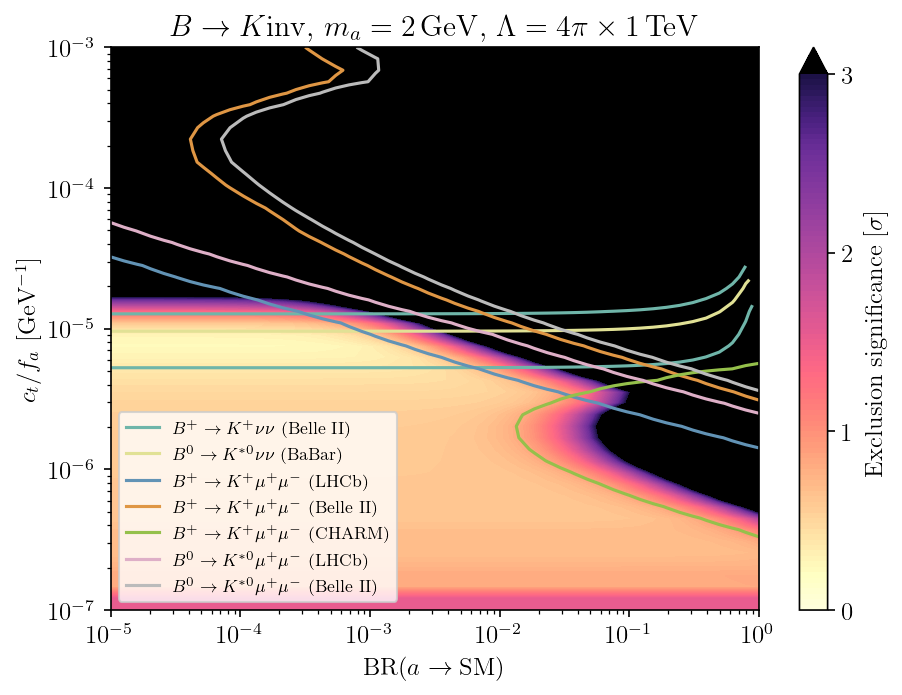

In [ ]:
plt.figure(dpi=150)
legend_elements = []
pl = plt.contourf(1-x_br_dark, y_cuR/fa, nsigmas(chi2_dark[('', 'Global')],2), levels=list(np.linspace(0, 3, 100)), cmap=cmap_newmaga, vmax=3, extend='max')
for observable, chi2_obs in chi2_dark.items():
    if observable == ('', 'Global'):
        break
    if max_finite(nsigmas(chi2_obs, 2)) < 2:
        continue
    plt.contour(1-x_br_dark, y_cuR/fa, nsigmas(chi2_obs, 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$\mathrm{BR}(a\to \mathrm{SM})$')
plt.ylabel(r'$c_t/f_a$ [GeV$^{-1}$]')
plt.xlim(1e-5, 1.0)
plt.title(r'$B \to K \mathrm{inv}$, $m_a = 2\,\mathrm{GeV}$, $\Lambda = 4\pi\times 1\,\mathrm{TeV}$')
plt.legend(handles = legend_elements, loc='lower left', fontsize=8)
plt.tight_layout()

In [ ]:
fa = 1000
couplings = [ALPcouplings({'cuR': np.diag([0, 0, cuR])}, scale=4*np.pi*fa, basis='derivative_above').match_run(5.0, 'VA_below', 'leadinglog') for cuR in np.logspace(-4, 0, 50)]
x_br_dark, y_couplings = np.meshgrid(br_dark, couplings)
x_br_dark, y_cuR = np.meshgrid(br_dark, np.logspace(-4, 0, 50))

In [ ]:
chi2_dark = get_chi2(transitions, 0.3, y_couplings, fa, br_dark = x_br_dark, integrator='no_rge')

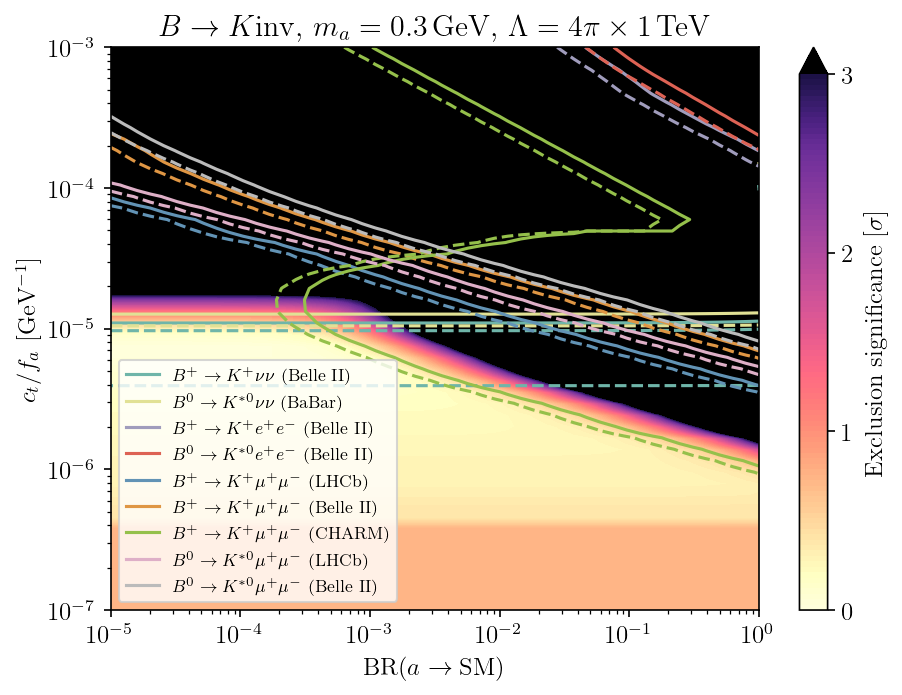

In [ ]:
plt.figure(dpi=150)
legend_elements = []
pl = plt.contourf(1-x_br_dark, y_cuR/fa, nsigmas(chi2_dark[('', 'Global')],2), levels=list(np.linspace(0, 3, 100)), cmap=cmap_newmaga, vmax=3, extend='max')
for observable, chi2_obs in chi2_dark.items():
    if observable == ('', 'Global'):
        break
    if max_finite(nsigmas(chi2_obs, 2)) < 2:
        continue
    plt.contour(1-x_br_dark, y_cuR/fa, nsigmas(chi2_obs, 2), levels=[1,2], colors = colors[observable], linestyles=['dashed', 'solid'])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$\mathrm{BR}(a\to \mathrm{SM})$')
plt.ylabel(r'$c_t/f_a$ [GeV$^{-1}$]')
plt.xlim(1e-5, 1.0)
plt.title(r'$B \to K \mathrm{inv}$, $m_a = 0.3\,\mathrm{GeV}$, $\Lambda = 4\pi\times 1\,\mathrm{TeV}$')
plt.legend(handles = legend_elements, loc='lower left', fontsize=8)
plt.tight_layout()

In [ ]:
from alpaca.constants import mK, mpi0

In [ ]:
ma = np.linspace(mK-mpi0, 5.0, 50)
couplings = [ALPcouplings({'cdR': np.matrix([[0, 0, 0], [0, 0, cdR], [0, 0, 0]])}, scale=4*np.pi*1000, basis='derivative_above').match_run(5.0, 'VA_below', 'leadinglog') for cdR in np.logspace(-8, 0, 50)]
x_ma, y_couplings = np.meshgrid(ma, couplings)
x_ma, y_cdR = np.meshgrid(ma, np.logspace(-8, 0, 50))

In [ ]:
chi2 = get_chi2(transitions, x_ma, y_couplings, 1000, br_dark = 0.0, integrator='no_rge')

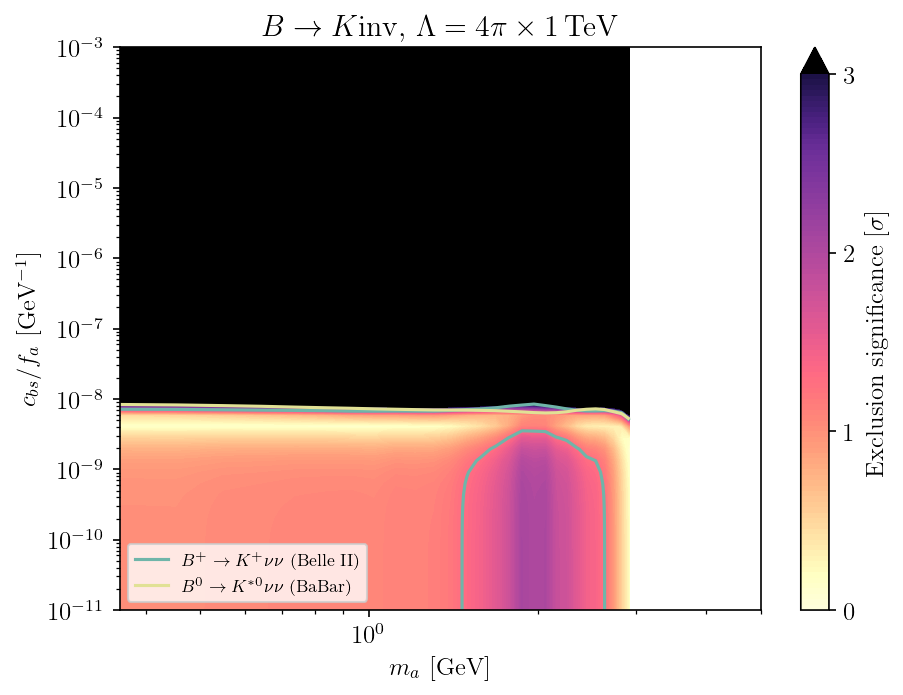

In [ ]:
plt.figure(dpi=150)
legend_elements = []
pl = plt.contourf(x_ma, y_cdR/fa, nsigmas(chi2[('', 'Global')],2), levels=list(np.linspace(0, 3, 100)), cmap=cmap_newmaga, vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    if max_finite(nsigmas(chi2_obs, 2)) < 2:
        continue
    plt.contour(x_ma, y_cdR/fa, nsigmas(chi2_obs, 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$c_{bs}/f_a$ [GeV$^{-1}$]')
#plt.xlim(1e-5, 1.0)
plt.title(r'$B \to K \mathrm{inv}$, $\Lambda = 4\pi\times 1\,\mathrm{TeV}$')
plt.legend(handles = legend_elements, loc='lower left', fontsize=8)
plt.tight_layout()

In [ ]:
ma = np.linspace(mK-mpi0, 5.0, 100)
couplings = [ALPcouplings({'cdR': np.matrix([[0, 0, 0], [0, 0, cdR], [0, 0, 0]]), 'cg': 1.0}, scale=4*np.pi*1000, basis='derivative_above').match_run(5.0, 'VA_below', 'leadinglog') for cdR in np.logspace(-6, 0, 50)]
x_ma, y_couplings = np.meshgrid(ma, couplings)
x_ma, y_cdR = np.meshgrid(ma, np.logspace(-6, 0, 50))
fa = 1000

In [ ]:
chi2 = get_chi2(transitions, x_ma, y_couplings, 1000, br_dark = 0.0, integrator='no_rge')

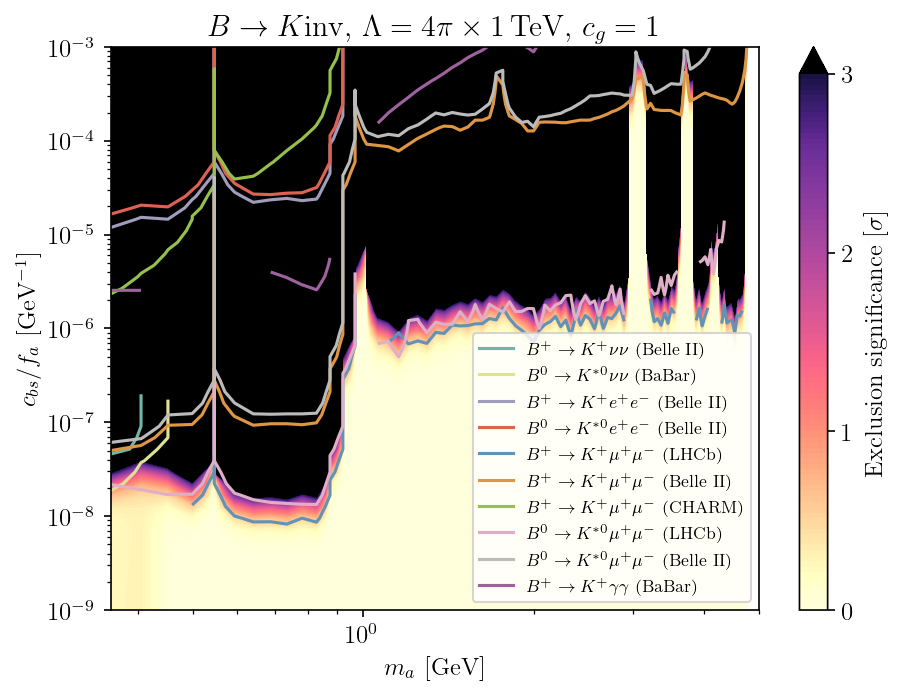

In [ ]:
plt.figure(dpi=150)

legend_elements = []
pl = plt.contourf(x_ma, y_cdR/fa, nsigmas(chi2[('', 'Global')],2), levels=list(np.linspace(0, 3, 100)), cmap=cmap_newmaga, vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    if max_finite(nsigmas(chi2_obs, 2)) < 2:
        continue
    plt.contour(x_ma, y_cdR/fa, nsigmas(chi2_obs, 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$c_{bs}/f_a$ [GeV$^{-1}$]')
#plt.xlim(1e-5, 1.0)
plt.title(r'$B \to K \mathrm{inv}$, $\Lambda = 4\pi\times 1\,\mathrm{TeV}$, $c_g = 1$')
plt.legend(handles = legend_elements, loc='lower right', fontsize=8)
plt.tight_layout()

In [ ]:
ma = np.hstack([np.logspace(np.log10(0.103), 0, 50), np.linspace(1.01, 5, 50)])
fa = np.logspace(3, 7, 50)
couplings = [ALPcouplings({'cuR': np.diag([0, 0, 1.0])}, scale=4*np.pi*f, basis='derivative_above').match_run(5.0, 'VA_below', 'leadinglog') for f in fa]

In [ ]:
x_ma, y_couplings = np.meshgrid(ma, couplings)
x_ma, y_fa = np.meshgrid(ma, fa)
chi2_dark = get_chi2(transitions, x_ma, y_couplings, y_fa, br_dark = 1e-3, integrator='no_rge')

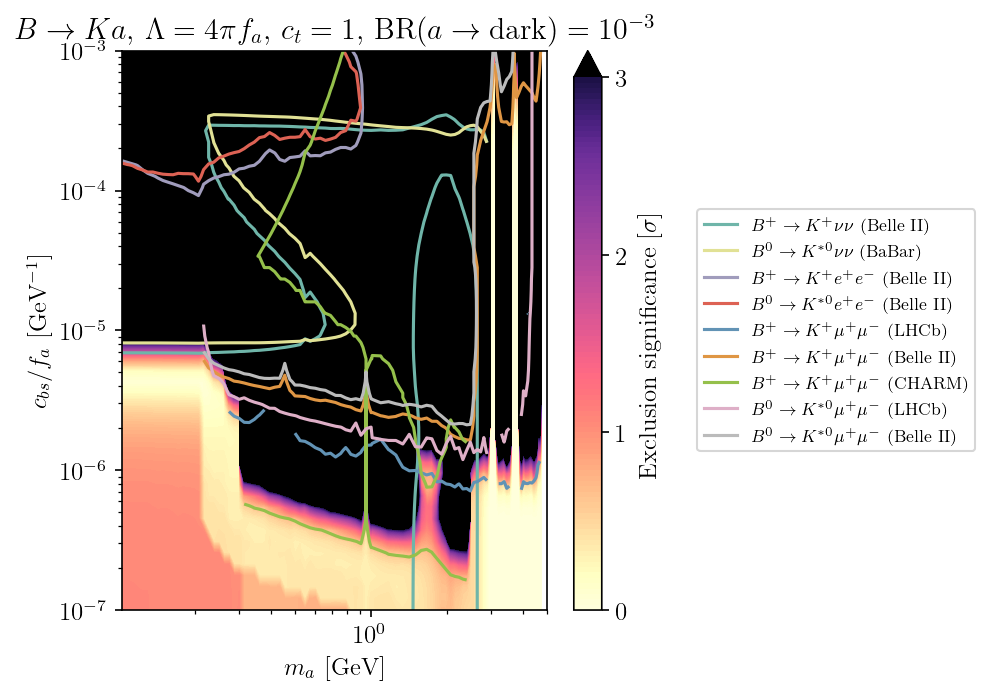

In [ ]:
plt.figure(dpi=150)

legend_elements = []
pl = plt.contourf(x_ma, 1/y_fa, nsigmas(chi2_dark[('', 'Global')],2), levels=list(np.linspace(0, 3, 100)), cmap=cmap_newmaga, vmax=3, extend='max')
for observable, chi2_obs in chi2_dark.items():
    if observable == ('', 'Global'):
        break
    if max_finite(nsigmas(chi2_obs, 2)) < 2:
        continue
    plt.contour(x_ma, 1/y_fa, nsigmas(chi2_obs, 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$c_{bs}/f_a$ [GeV$^{-1}$]')
#plt.xlim(1e-5, 1.0)
plt.title(r'$B \to K a$, $\Lambda = 4\pi f_a$, $c_t = 1$, $\mathrm{BR}(a\to \mathrm{dark}) = 10^{-3}$')
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)
plt.tight_layout()